### Assignment 1

In [12]:
from math import log
from scipy.optimize import root_scalar as solve
import matplotlib.pyplot as plt
import numpy as np

In [2]:
xx = [5,10,20,40,80,160,320]

In [3]:
# smooth to rough
z01 = 0.001
z02 = 1
M = log(z02/z01)

In [7]:
# rough to smooth
M = log(z01/z02)

In [8]:
k, B = 0.4, 1.25
An = 1 + 0.1*M

In [5]:
yy = [solve((lambda y: y*(log(y/z01)-1) - B*k*An*x), 
             bracket=(0.01,x*x),method='bisect').root 
             for x in xx]

yy

[0.7517948093067178,
 1.3601595593574434,
 2.4805170031775226,
 4.5549142886236,
 8.414245081546508,
 15.625231751660166,
 29.150579498618185]

In [6]:
np.round(yy,1)

array([ 0.8,  1.4,  2.5,  4.6,  8.4, 15.6, 29.2])

In [9]:
yy_ = [solve((lambda y: y*(log(y)-1) - B*k*An*x), 
             bracket=(0.01,x*x),method='bisect').root 
             for x in xx]

yy_

[3.409977392304376,
 4.00068157095102,
 5.027945909691015,
 6.773584904928293,
 9.712917065064575,
 14.672682308326685,
 23.114579589736188]

In [10]:
np.round(yy_,1)

array([ 3.4,  4. ,  5. ,  6.8,  9.7, 14.7, 23.1])

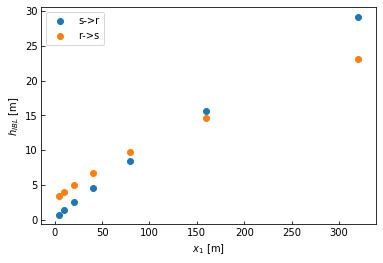

In [11]:
fig,ax = plt.subplots()
ax.scatter(xx,yy)
ax.scatter(xx,yy_)
ax.tick_params(direction='in')
ax.set_xlabel('$x_1$ [m]')
ax.set_ylabel('$h_{IBL}$ [m]')
ax.legend(['s->r','r->s'])

IBL is lower for the transition smooth to rough near the transition x=0; for larger x1 (~> 100m) IBL is lower for the transition rough to smooth.

b) $x_1$ ~ 10$h_{IBL}$

so a 'rule-of-thumb' estimate for 
fetch ~ 10$z_m$

### Assignment 2

In [53]:
z0 = 0.05
zm = 20
X = 0.87

#case I
L = -20
h = 2500

#case II
L = inf
h = 2500

#case III
L = 20
h = 170

z_L = -1, 0, 1

In [60]:
h = 2500
z_L = -1
x = (1-16*z_L) ** (1/4)
psi = 2*log((1+x)/2) + log((1+x**2)/2) - 2*np.arctan(x) + np.pi/2
psi

1.1162322497683264

In [68]:
h = 170
psi = -6

-6

In [62]:
dist = X*zm*(log(zm/z0)-psi) / (1-zm/h)
dist

85.51314715091735

case I unstable: 85.51 m

case II neutral: 105.09 m

case III stable: 236.47 m

The distance of maximum footprint is the largest in the stable case III, because in this case the turbulent mixing is relatively small, so the flow signal can be carried further away than the neutral case II, the maximum footprint distance of which is again larger the unstable case I, where the mixing is the largest.

### Assignment 3

a)

i. mean building height $z_s$ = 15 m

height of roughness sublayer at the urban site $z_*$ = 3$z_s$ = 45 m

roughness length $z_{ou}$ = 0.1$z_s$ = 1.5 m

zeroplane displacement height $z_{du}$ = 0.7$z_s$ = 10.5 m

ii. log wind profile

#### $u_r = \frac{u_{*r}}{k} ln \frac{z_{mr}}{z_{or}}$

friction velocity at the airport 

#### $u_{*r} = \frac{u_r*k}{ln(\frac{z_{mr}}{z_{or}})}$

In [63]:
z_or = 0.015
u_r = 6*0.4/np.log(10/z_or)
u_r

0.369100722503963

#### $\frac{u_{*u}}{u_{*r}} = (\frac{z_{ou}}{z_{or}})^\alpha$

friction velocity at the urban site $u_{*u}$

In [64]:
z_ou = 1.5
alpha = 0.0706
u_u = u_r * (z_ou/z_or) ** alpha
u_u

0.510910578959668

The relative magnitude of $𝑢_{∗𝑢}$ and $𝑢_{∗𝑟}$ correspond to your expectations. Because a rough surface exhibit more friction than a smooth(er) surface, so the friction velocity at the urban site (rougher) is larger than at the airport.

iii. urban friction velocity $u_{*u}$ corresponds to $z_{*u}$ i.e. the height of urban roughness sublayer

b)

i.

In [65]:
a = 1.28
b = 3
z_star = 45
z_du = 10.5
z_star_prime = z_star - z_du

$\bar{u}_u = \frac{u_{*u}}{k} ln \frac{z_{mu}}{z_{ou}}$

friction velocity at the urban site 

$u_{*u} = \frac{\bar{u}_u*k}{ln(\frac{z_{mu}}{z_{ou}})}$

In [77]:
k = 0.4
z_mu = 20
z_ou = 1.5
u_u = 5.4
u_star_IS = u_u * k / np.log(z_mu/z_ou)
u_star_IS

0.8338908159028566

In [99]:
z = np.arange(15,45,0.1) #,dtype=np.complex)
z_prime = z - z_du
Z = z_prime / z_star_prime;

u_star_l = u_star_IS * np.sin(np.pi/2 * Z) ** (a/b)

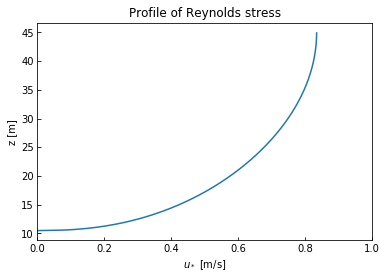

In [48]:
plt.plot(u_star_l, z)
plt.xlim([0,1.])
plt.title('Profile of Reynolds stress')
plt.xlabel('${u_*}$ [m/s]') #'/{u_*^{IS}}$')
plt.ylabel('z [m]') #${z^{\prime}}/{z_*^{\prime}}$')

ax = plt.gca()
ax.tick_params(direction='in')

#### $\bar{u} = \frac{u_*}{k} ln \frac{z_m}{z_o}$

In [100]:
u1_bar = u_star_l/k * np.log(z/35) + 5.4

In [101]:
u2_bar = u_star_IS/k * np.log(z/35) + 5.4

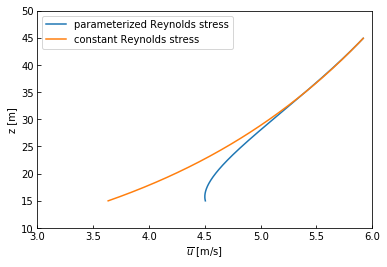

In [102]:
fig,ax = plt.subplots()
ax.plot(u1_bar,z)
ax.plot(u2_bar,z)
ax.tick_params(direction='in')
ax.set_xlim([3,6])
ax.set_ylim([10,50])
ax.set_xlabel('$\overline{u}$ [m/s]')
ax.set_ylabel('z [m]')
ax.legend(['parameterized Reynolds stress','constant Reynolds stress'])

The mean wind speed with constant Reynolds stress increases faster than with parameterized one. Compared to constant Reynolds stress, the use of parameterized Reynolds stress would lead to higher mean wind speed at the rooftop height, which means lower pollutant concentration after they are more efficiently carried away, similar to the results in Rotach (2001).